# Before your start:
- Read the README.md file.
- Comment as much as you can and use the resources (README.md file).
- Happy learning!

In [1]:
# Libraries
import matplotlib.pyplot as plt
import scipy 
from scipy.stats import norm

# Challenge 1 - Generate and Plot Normal Distributions
#### Step 1: Generate samples and test normal distribution.

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed.

**Hint**: Read the documentation for `scipy.stats.norm.rvs`. The function will help you create the normal random samples.

In [2]:
mu=50 #mean value

sigma=5 #standard deviation

sample_size=[10,50,500,5000]

sample_1 = scipy.stats.norm.rvs(loc = mu, scale = sigma, size=10)

sample_2 = scipy.stats.norm.rvs(50,5,50)

sample_3 = scipy.stats.norm.rvs(50,5,500)

sample_4 = scipy.stats.norm.rvs(50,5,5000)

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [3]:
sample_1

array([43.30499009, 45.347622  , 49.59521781, 49.83721725, 48.61253678,
       51.74047642, 47.66646099, 49.59750573, 45.60168662, 41.38521676])

#### Step 2: Plot normal distributions.

To check the shape of the samples you have just created, you can use matplotlib. For example, you can use it to plot a histogram of each sample. 

If you did, your outputs would be really similar to the ones below:

![normal distributions with different sample sizes](../images/ch-1.png)

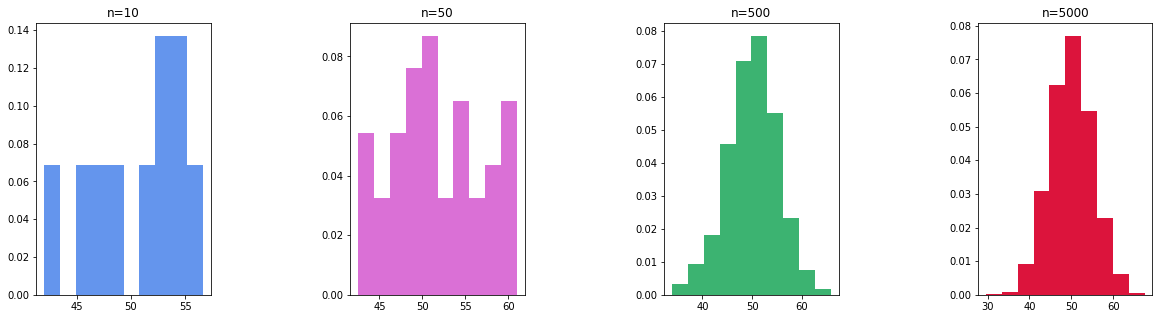

In [22]:
fig, [ax1, ax2,ax3,ax4] = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
ax1.hist(sample_1, density=True, color='cornflowerblue')
ax1.set_title('n=10')
ax2.hist(sample_2, density=True, color='orchid')
ax2.set_title('n=50')
ax3.hist(sample_3, density=True, color= 'mediumseagreen')
ax3.set_title('n=500')
ax4.hist(sample_4, density=True, color='crimson')
ax4.set_title('n=5000')
plt.subplots_adjust(wspace=0.8) #we adjust the space between the two subplots, since the ylabels are overlapped.
plt.show()


#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

From looking at the graphs above we can see that we are confirming the Central Limit Theorem. In here, we can see that even if each random variable follows a different probability distribution, since they are equally distributed, they are from the same family and they have the same parameters. Also, all the RV are independent. Hence, when we aggregate all the random variables under a new one we follow a normal distribution, as can be seen in the final graph. 

#### Bonus: Plot normal distributions.

Even though you still don't know how to use matplotlib, as a bonus challenge, you can try to reproduce the plot above using the samples you have created. This plotting library will be introduced later this week, so don't worry if you don't manage to get the results you want now: you can always come back to solve this challenge later.

In [ ]:
# your code here

# Challenge 2 - Plot Probability Mass Function (PMF)

### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

### Challenge

We assume that the probability of clicking an advertisement in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

#### Step 1: Create the binomial distribution mentioned above. Store the result in a variable called `dist`. 
**Hint**: use binom from `scipy.stats.binom`. This object takes *n* and *p* as shape parameters, where *n* is the number of independent experiments and *p* the probability of success of the experiment.

In [25]:
n=5

dist = scipy.stats.binom(n=n, p=0.15)

#### Step 2: Plot the PMF of the distribution. 
To do it, run the code in the cell below. 

**Hint**: Your output should look like the one below:

![binom 10](../images/ch-2.png)

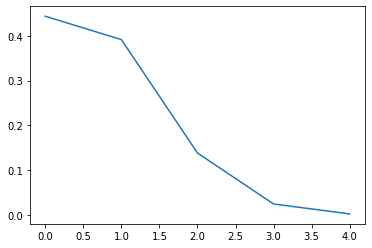

In [26]:
# run this code
x = range(n)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Step 3: Explain what you observe from the plot above.

From this graph we can see that as soon as the number of people that watches the video increases, the probability decreases significantly. 

#### Step 4: Now plot PMF with 50, 500, and 5000 visitors.
To plot the PMF, you can copy the code given above and replace variable `dist` for the name of the variables where you have stored the new binomial objects for 50, 500 and 5000 visitors.

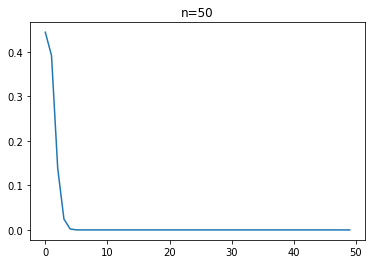

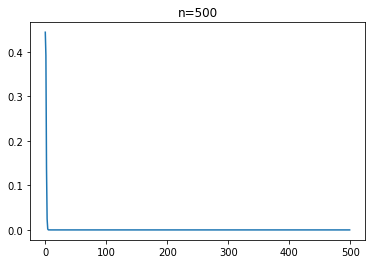

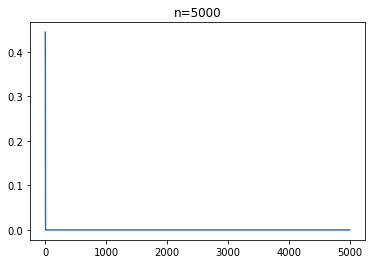

In [30]:
# run this code

n_labels = [50,500,5000]

for n in n_labels:
    
    x = range(n)

    fig, ax = plt.subplots(1, 1)
    
    plt.title(f"n={n}")

    plt.plot(x, dist.pmf(x))

    plt.show()

#### Step 5: What did you notice from the distribution plots? Comment your findings.

We can see from this graph that when the sample is greater enough the probability reaches 0 value. With a small sample we can see that there is some probability but at some point, after a sample great enough, the probability tends to 0. Also, when we are having a huge sample in this graph, we are not able to see the trend of the probability. 

# Challenge 3
#### Step 1: Research the Poisson distribution. Write about your own understanding of the Poisson distribution.

The poisson distribution is the model used for describing randomly ocurring events and by itself, is not useful at all. With the poisson distribution we can analyse the probability of a number of events in a time period, or finding the probability of waiting some time until the next event. It can also be done with another variables as distance. 

#### Step 2: A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

**Hint**: use `scipy.stats.poisson.pmf`.

In [31]:
scipy.stats.poisson.pmf(k=320, mu= 300)

0.011612348610402475

In [33]:
f"The probability of getting 320 visits per day is {scipy.stats.poisson.pmf(k=320, mu= 300)}"

'The probability of getting 320 visits per day is 0.011612348610402475'

#### Step 3: What is the probability of getting 60 visits?

In [34]:
scipy.stats.poisson.pmf(k=60, mu= 300)

2.622743762294515e-64

The probability of getting only 60 visits on 1 day is nearly 0. 

#### Step 4: Create a list to store the Poisson distribution probabilities for 0 to 1000 visitors. Store your list in a variable called `arr`.

In [35]:
arr=[]

visitors_lst= range(1001)

for visitors in visitors_lst: 
    arr.append(scipy.stats.poisson.pmf(k=visitors, mu= 300))

#### Step 5: Plot the probabilities.
To do it, run the code in the cell below. Your plot should look like the one below:

![poisson distribution](../images/ch-3.png)

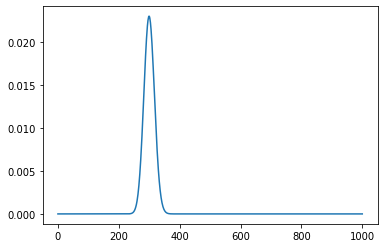

In [36]:
# run this code
plt.plot(arr)
plt.show()

# Challenge 4 - Central Limit Theorem

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: What is the probability that the mean delivery time today is between 30 and 35 minutes?

Since we are working with the normal cumulative distribution function, we calculate which is the probability of having a value equal to 30 and then equal to 35. After that, we substract there two values. 

In [38]:
prob_30 = scipy.stats.norm.cdf(x=30, loc=35, scale=8)

prob_35 = scipy.stats.norm.cdf(x=35, loc=35, scale=8)


In [39]:
prob = prob_35 - prob_30

In [40]:
print(f"The probability that the mean delivery time today is between 30 and 35 is {prob}")

The probability that the mean delivery time today is between 30 and 35 is 0.23401447095129946


#### Step 2: What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

We are using the central limit theorem to see that the delivery of all 200 packages will follow a normal distribution of mean = n · mu and std = sigma · sqrt(n)

The delivery of all packages will follow a normal with the following parameters. (7000, 113.4) [min]

115h to minutes= 6900 min


In [48]:
prob_115 = scipy.stats.norm.cdf(x=6900, loc=7000, scale=113.14)
print(f"The probability of taking more than 115h {1- prob_115}")

The probability of taking more than 115h 0.8116142937565707


we can do the same but considering the delivery mean time. In this case, the probability distribution will follow a normal distribution with the following parameters: (35, 0.5659). Then, we can calculate the probability for the mean delivery time to be greater than 115/200 = 34.5 min

In [47]:
prob_345 = scipy.stats.norm.cdf(x=34.5, loc=35, scale=0.5659)
print(f"The probability of taking more than 34.5 minutes {1- prob_345}")

The probability of taking more than 34.5 minutes 0.8115299589991075


# Challenge 5 - Normal Variables
The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40.

<div align="center">$X → N(200,40)$</div>

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: Find the probability that the monthly sales are more than 300.

In [50]:
print(f"The probability that me monthly sales are more than 300 is {1-scipy.stats.norm.cdf(x=300, loc=200, scale=40)}")

The probability that me monthly sales are more than 300 is 0.006209665325776159


#### Step 2: Find the probability that the monthly sales fall between 160 and 240.

In [54]:
#probability to be lower than 160
prob_160 = scipy.stats.norm.cdf(x=160, loc=200, scale=40)

In [53]:
#probability to be lower than 160
prob_240 = scipy.stats.norm.cdf(x=240, loc=200, scale=40)

In [55]:
# The probability that the monthly sales fall between 160 and 240
prob_240 - prob_160

0.6826894921370859

#### Step 3: Find the probability that the monthly sales do not exceed 150.

In [56]:
scipy.stats.norm.cdf(x=150, loc=200, scale=40)

0.10564977366685535

#### Step 4: Find the probability that the monthly sales exceed 3000.

In [58]:
prob_3000 = scipy.stats.norm.cdf(x=3000, loc=200, scale=40)

In [59]:
print(f"The probability that me monthly sales are more than 3000 is {1-prob_3000}")

The probability that me monthly sales are more than 3000 is 0.0


# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4.

**Hint**: `stats.poisson.cdf` can help you find the answers.

#### Step 1: Find the probability that in a particular month there is no violent robbery.

In [63]:
print(f"The probability that in a particular month there is no violent robbery is {scipy.stats.poisson.cdf(0,4)}")

The probability that in a particular month there is no violent robbery is 0.018315638888734182


#### Step 2: Find the probability that there are at least 1 robbery in a given month.

In [64]:
print(f"The probability that in a particular month there is one violent robbery is {scipy.stats.poisson.cdf(1,4)}")

The probability that in a particular month there is one violent robbery is 0.0915781944436709


#### Step 3: Find the probability that there are between 2 and 6 (inclusive) robberies in a given month.

We will calculate the probability of being lower or equal than 2 and lower or equal than 6. Then, we can substract both values between them and calculate the probability distribution between 2 and 6. 

In [68]:
prob_2 = scipy.stats.poisson.cdf(2,4)
prob_6 = scipy.stats.poisson.cdf(6,4)

In [69]:
print(f"The probability that in a particular month there is one violent robbery is {prob_6-prob_2}")

The probability that in a particular month there is one violent robbery is 0.6512227160438819


#### Step 4: Find the probability that there are more than 2 robberies in 15 days.

In [66]:
1 - scipy.stats.poisson.cdf(2,4)

0.7618966944464556

To do this, we are scaling the problem to our analysis. The number of robberies in one particular month is 4, so for 15 days it's going to be 2 for 15 days. Then, the poisson cumulative probability distribution tells us the probability to be lower than 2. Then, we can substract this probability to 1 and we will have the probability to be more than 2 in 15 days. 